In [1]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import FormRecognizerClient

In [2]:
# Code Snippet Source: L3 Demo 3 - Prebuilt Form Recognizer ID Model.ipynb
def get_id_card_details(identity_card):
    first_name = identity_card.fields.get("FirstName")
    if first_name:
        print("First Name: {} has confidence: {}".format(first_name.value, first_name.confidence))
    last_name = identity_card.fields.get("LastName")
    if last_name:
        print("Last Name: {} has confidence: {}".format(last_name.value, last_name.confidence))
    document_number = identity_card.fields.get("DocumentNumber")
    if document_number:
        print("Document Number: {} has confidence: {}".format(document_number.value, document_number.confidence))
    dob = identity_card.fields.get("DateOfBirth")
    if dob:
        print("Date of Birth: {} has confidence: {}".format(dob.value, dob.confidence))
    doe = identity_card.fields.get("DateOfExpiration")
    if doe:
        print("Date of Expiration: {} has confidence: {}".format(doe.value, doe.confidence))
    sex = identity_card.fields.get("Sex")
    if sex:
        print("Sex: {} has confidence: {}".format(sex.value, sex.confidence))
    address = identity_card.fields.get("Address")
    if address:
        print("Address: {} has confidence: {}".format(address.value, address.confidence))
    country_region = identity_card.fields.get("CountryRegion")
    if country_region:
        print("Country/Region: {} has confidence: {}".format(country_region.value, country_region.confidence))
    region = identity_card.fields.get("Region")
    if region:
        print("Region: {} has confidence: {}".format(region.value, region.confidence))

In [3]:
def display_image(path):    
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()

In [8]:
endpoint_form_recognizer = "https://udacity-fr.cognitiveservices.azure.com/"
key_form_recognizer = "60baf17acfa44cb19d630b2141b10931"
id_path =  "C:\\_Huissel\\PythonProjects\\workspace\\udacity\\cd0461-building-computer-vision-solutions-with-azure-project-starter\\starter\\sample_submission\\material_preparation_step\\digital_id\\ca-dl-avkash.png"

form_recognizer_client = FormRecognizerClient(endpoint=endpoint_form_recognizer, credential=AzureKeyCredential(key_form_recognizer))

In [9]:
def id_text_extraction(id_content_path):
    """
    Extracts text from image using Azure form recognizer
    """  
    with open(os.path.join (id_content_path), "rb") as image:
        id_content = form_recognizer_client.begin_recognize_identity_documents(image.read(), content_type = "image/png")
        id_content_result = id_content.result()
        
    return id_content_result         

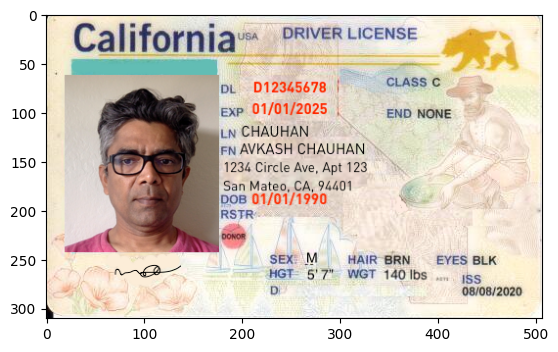

In [10]:
display_image(id_path)

In [12]:
id_text_result = id_text_extraction(id_path)

In [17]:
id_text_result[0].to_dict()


{'fields': {'Address': {'value_type': 'string',
   'name': 'Address',
   'value': '1234 Circle Ave, Apt 123 San Mateo, CA, 94401',
   'confidence': 0.617,
   'label_data': None,
   'value_data': {'text': '1234 Circle Ave, Apt 123 San Mateo, CA, 94401',
    'bounding_box': [{'x': 180.0, 'y': 149.0},
     {'x': 328.0, 'y': 149.0},
     {'x': 328.0, 'y': 182.0},
     {'x': 180.0, 'y': 182.0}],
    'page_number': 1,
    'field_elements': []}},
  'CountryRegion': {'value_type': 'countryRegion',
   'name': 'CountryRegion',
   'value': 'USA',
   'confidence': 0.99,
   'label_data': None,
   'value_data': None},
  'DateOfBirth': {'value_type': 'date',
   'name': 'DateOfBirth',
   'value': datetime.date(1990, 1, 1),
   'confidence': 0.995,
   'label_data': None,
   'value_data': {'text': '01/01/1990',
    'bounding_box': [{'x': 208.0, 'y': 182.0},
     {'x': 285.0, 'y': 181.0},
     {'x': 285.0, 'y': 196.0},
     {'x': 208.0, 'y': 196.0}],
    'page_number': 1,
    'field_elements': []}},
  'Da

In [14]:
get_id_card_details(id_text_result[0])

First Name: AVKASH CHAUHAN has confidence: 0.824
Last Name: CHAUHAN has confidence: 0.908
Document Number: D1234578 has confidence: 0.995
Date of Birth: 1990-01-01 has confidence: 0.995
Date of Expiration: 2025-01-01 has confidence: 0.99
Sex: M has confidence: 0.985
Address: 1234 Circle Ave, Apt 123 San Mateo, CA, 94401 has confidence: 0.617
Country/Region: USA has confidence: 0.99
Region: California has confidence: 0.973
